In [5]:
from langgraph.graph import StateGraph, START, END

In [2]:
from typing import TypedDict

In [17]:
# Define State
class BMIState(TypedDict):
    height: float  # in meters
    weight: float  # in kilograms
    bmi: float     # Body Mass Index
    level: str     # BMI Category

In [4]:
def calculate_bmi(state: BMIState) -> BMIState:
    state['bmi'] = state['weight'] / (state['height'] ** 2)
    return state

In [18]:
def bmi_level(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['level'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['level'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['level'] = 'Overweight'
    else:
        state['level'] = 'Obesity'
    return state

In [20]:
# Define Graph
graph = StateGraph(BMIState)
# Define Nodes
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("bmi_level", bmi_level)

# Define Edges
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "bmi_level")
graph.add_edge("bmi_level", END)

#compile the graph
workflow = graph.compile()

In [22]:
#executing the graph
final_state = workflow.invoke({"height": 1.75, "weight": 70, "bmi": 0, "level": ""})

print(final_state)  # Should print the state with calculated BMI

{'height': 1.75, 'weight': 70, 'bmi': 22.857142857142858, 'level': 'Normal weight'}


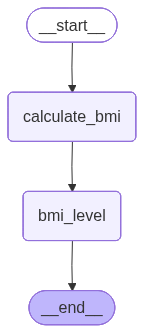

In [21]:
from IPython.display import display, Image
Image(workflow.get_graph().draw_mermaid_png())